In [15]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import beta
from numpy.random import normal
plt.rcParams['figure.figsize'] = [8, 8]
from scipy.stats import beta as beta_rv
from scipy.stats import norm as norm_rv
from scipy.integrate import quad
from IPython.display import display

Note, we are trying to find when the integral
$$
\frac{\sqrt{n}}{\sqrt{2\pi\sigma^2}}\int_{-0.01}^{0.01} \exp\left(\frac{-nx^2}{2\sigma^2}\right)dx
$$
where $\sigma_2 \leq \frac{1}{4}$. 

In [17]:
def find_n():
    for n in range(1, int(1e6)):
        func = lambda x: np.sqrt(n)/np.sqrt(2*np.pi*(1/4.))*np.exp(-(n*x**2)/(2*(1/4.)))
        integral = quad(func, -0.01, 0.01)[0]
        #func = lambda x: 1/np.sqrt(2*np.pi) *np.exp(-x**2/2)
        #integral = quad(func, -np.inf, 0.01/((1/2.)/np.sqrt(n)))[0]
        if integral >= 0.99:
            return n

n_val = find_n()
display(n_val)


16588

## Jarivs Assigned

### Part 1

Let $X\sim\operatorname{Beta}\left(\frac{1}{2}, \frac{1}{2}\right)$. Note that $\mu =\mathbb{E}[X] = \frac{1}{2}$. 

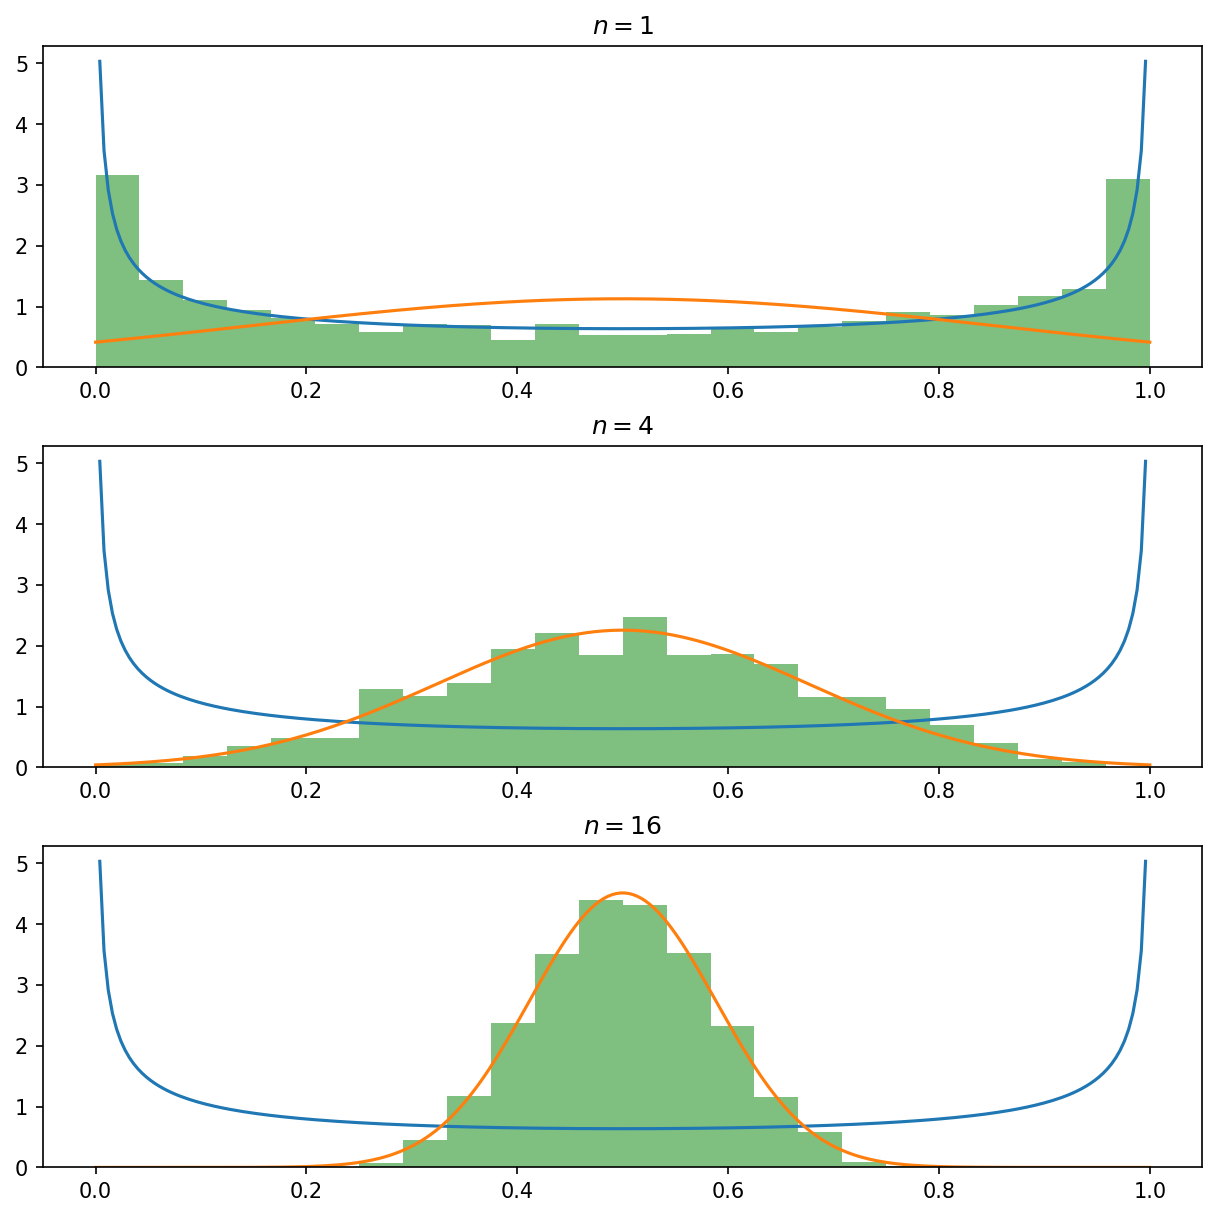

In [68]:
a, b, = 1/2., 1/2.

n_vals = [1, 4, 16]

approx_mu = np.zeros((3, 1000))
real_mu = 1/2.
real_var = (1/2 * 1/2)/((1/2+1/2)**2 * (1/2 + 1/2 +1))

for i, n in enumerate(n_vals):
    for j in range(0, 1000):
        beta_draw = beta(a, b, size=n)
        approx_mu[i, j] = np.sum(beta_draw) / n


fig, axs = plt.subplots(nrows=3, ncols=1, constrained_layout=True)
fig.set_dpi(150)
bins = np.linspace(0, 1, 25)
x = np.linspace(0, 1, 250)

for i, ax in enumerate(axs):
    ax.hist(approx_mu[i], color='g', alpha=0.5, bins=bins, density=True)
    ax.plot(x, beta_rv.pdf(x, 1/2., 1/2))
    ax.plot(x, norm_rv.pdf(x, loc=real_mu, scale=np.sqrt(real_var/n_vals[i])))
    ax.set_title(r'$n = $' + str(n_vals[i]))


plt.show()

### Part 2

Let $X\sim \mathscr{N}(0, 10)$ then $\mu = 0$ and $\sigma^2 = 10$.

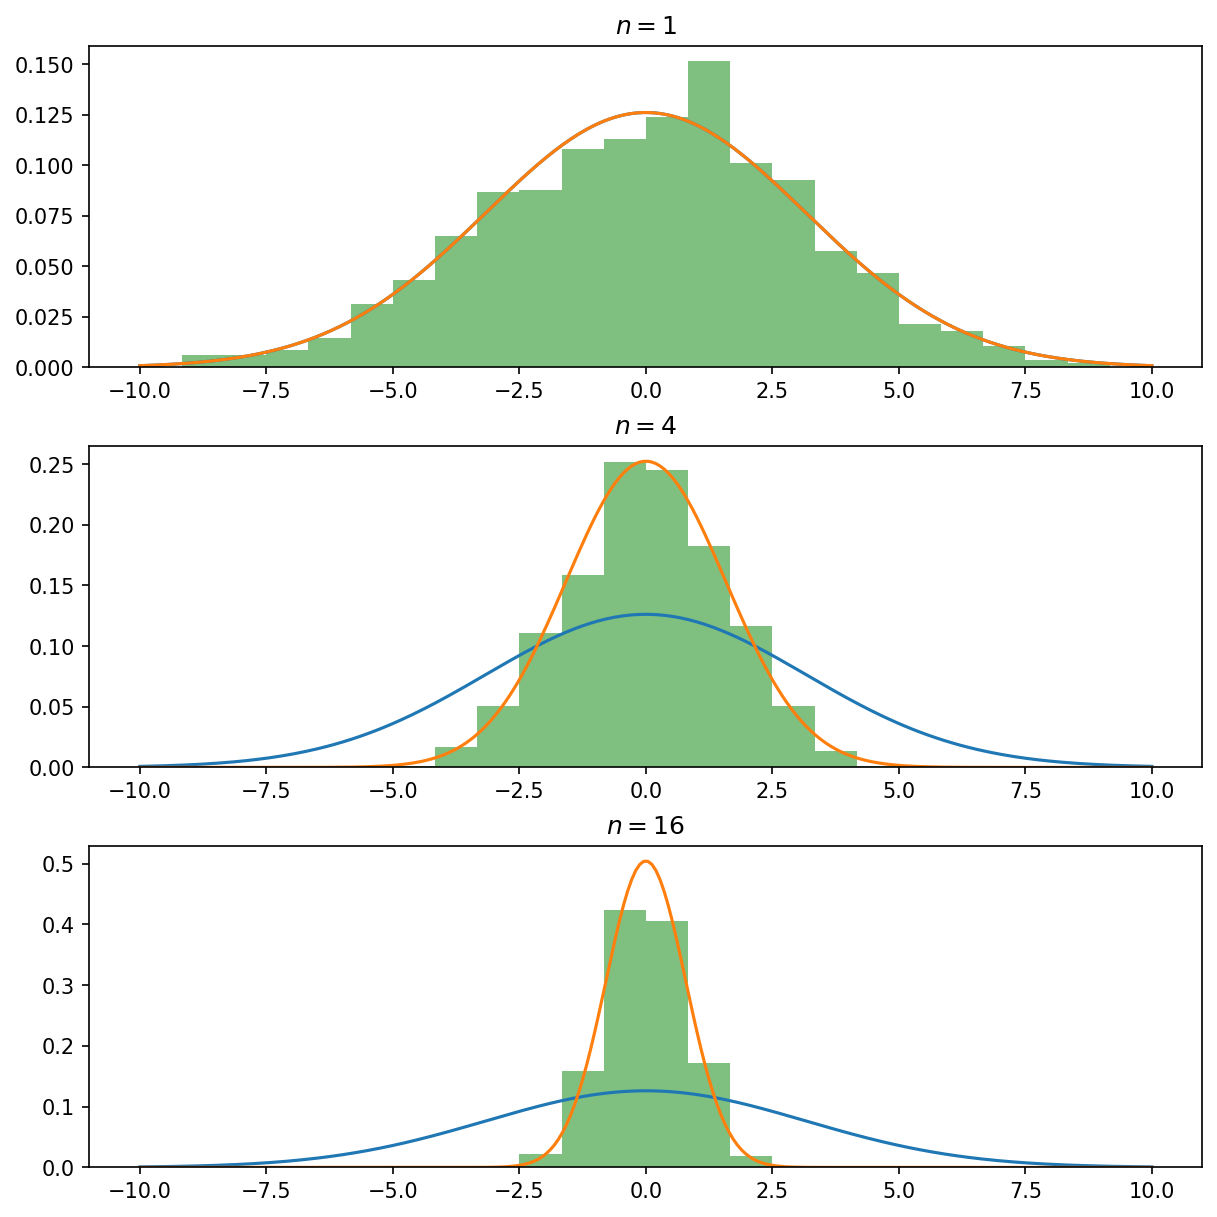

In [69]:
n_vals = [1, 4, 16]

approx_mu = np.zeros((3, 1000))
real_mu = 0
real_var = 10 

for i, n in enumerate(n_vals):
    for j in range(1000):
        normal_draw = normal(loc=real_mu, scale=np.sqrt(real_var), size=n)
        approx_mu[i, j] = np.sum(normal_draw) / n



fig, axs = plt.subplots(nrows=3, ncols=1, constrained_layout=True)
fig.set_dpi(150)
bins = np.linspace(-10, 10, 25)
x = np.linspace(-10, 10, 250)

for i, ax in enumerate(axs):
    ax.hist(approx_mu[i], color='g', alpha=0.5, bins=bins, density=True)
    ax.plot(x, norm_rv.pdf(x, loc=real_mu, scale=np.sqrt(real_var)))
    ax.plot(x, norm_rv.pdf(x, loc=real_mu, scale=np.sqrt(real_var/n_vals[i])))
    ax.set_title(r'$n = $' + str(n_vals[i]))

plt.show()
